## Train Agent on Osu Environment using Nosiy Dueling DQN

In [1]:
from environment import OsuEnvironment
from agent import Agent
from model import DQN
import torch
import torch.nn as nn
import torch.optim as optim
import os
import warnings
import logging

if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    !pip install -r yolov5/requirements.txt

warnings.simplefilter("ignore", FutureWarning)
logging.getLogger('ultralytics').setLevel(logging.ERROR)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# define arguments for Agent
env = OsuEnvironment()
dueling_dqn = True
noisy_dqn = True

policy_net = DQN(env.observation_space.shape[0], env.observation_space.shape[1], env.action_space.nvec, dueling=dueling_dqn, noisy=noisy_dqn).to(device)
target_net = DQN(env.observation_space.shape[0], env.observation_space.shape[1], env.action_space.nvec, dueling=dueling_dqn, noisy=noisy_dqn).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.Adam(policy_net.parameters(), lr=0.001)
criterion = nn.MSELoss()

agent = Agent(env, policy_net, target_net, criterion, optimizer, noisy_dqn=noisy_dqn)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bohui/.cache\torch\hub\master.zip
YOLOv5  2024-11-19 Python-3.11.5 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Listening on 127.0.0.1:5555


In [ ]:
agent.train(total_episode=500)

Epsiode: 10: Total Reward: -12018, Loss: 7.348752086888189
Epsiode: 20: Total Reward: -388, Loss: 7.191938906004935
Epsiode: 30: Total Reward: -4803, Loss: 6.840510227293244
Epsiode: 40: Total Reward: -5986, Loss: 6.925359386310243
Epsiode: 50: Total Reward: -794, Loss: 7.370906255016588
Epsiode: 60: Total Reward: -1343, Loss: 7.282136506047742
Epsiode: 70: Total Reward: -2052, Loss: 7.409800539278004
Epsiode: 80: Total Reward: -994, Loss: 8.02492662917736
Epsiode: 90: Total Reward: -514, Loss: 7.755823481082916
Epsiode: 100: Total Reward: -960, Loss: 8.157835674285888
Epsiode: 110: Total Reward: -1970, Loss: 8.251249874339385
Epsiode: 120: Total Reward: -480, Loss: 7.901833318528675
Epsiode: 130: Total Reward: -617, Loss: 8.315153676636365
Epsiode: 140: Total Reward: -371, Loss: 8.666952569144113
Epsiode: 150: Total Reward: -619, Loss: 8.66058105533406
Epsiode: 160: Total Reward: -406, Loss: 8.07354864321257
Epsiode: 170: Total Reward: -299, Loss: 8.54900463104248
Epsiode: 180: Total 

In [5]:
# ensure inline ploting is enable
%matplotlib inline

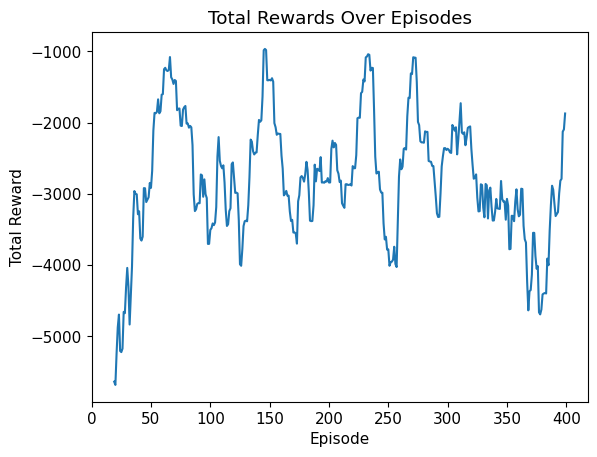

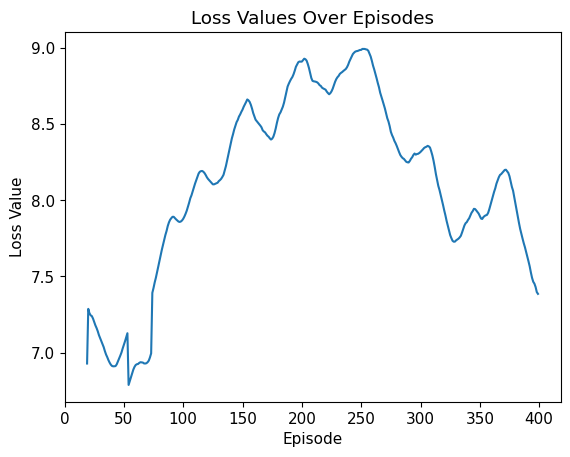

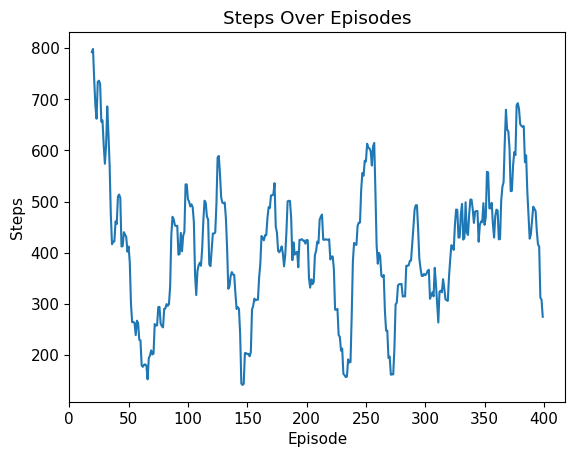

In [9]:
agent.plot()

In [ ]:
agent.eval(total_episode=10)

KeyboardInterrupt: 